<a href="https://colab.research.google.com/github/kanakesh2006/Practical-Deep-Learning-using-PyTorch/blob/main/Employee_Performance_%26_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Employee_Performance_Retention.csv")

In [3]:
print(df.shape)

(9000, 10)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee_ID                9000 non-null   object
 1   Age                        9000 non-null   int64 
 2   Department                 9000 non-null   object
 3   Years_of_Experience        9000 non-null   int64 
 4   Monthly_Working_Hours      9000 non-null   int64 
 5   Training_Hours_per_Year    9000 non-null   int64 
 6   Performance_Rating         9000 non-null   int64 
 7   Job_Satisfaction_Level     9000 non-null   object
 8   Promotion_in_Last_2_Years  9000 non-null   object
 9   Attrition                  9000 non-null   object
dtypes: int64(5), object(5)
memory usage: 703.3+ KB
None


In [5]:
print(df.isnull().sum())

Employee_ID                  0
Age                          0
Department                   0
Years_of_Experience          0
Monthly_Working_Hours        0
Training_Hours_per_Year      0
Performance_Rating           0
Job_Satisfaction_Level       0
Promotion_in_Last_2_Years    0
Attrition                    0
dtype: int64


In [6]:
print(df['Attrition'].value_counts())

Attrition
No     7247
Yes    1753
Name: count, dtype: int64


/tmp/ipython-input-3974913670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


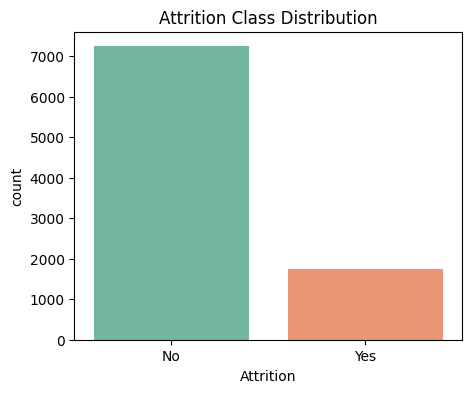

In [7]:
# Attrition class balance
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Attrition Class Distribution")
plt.show()

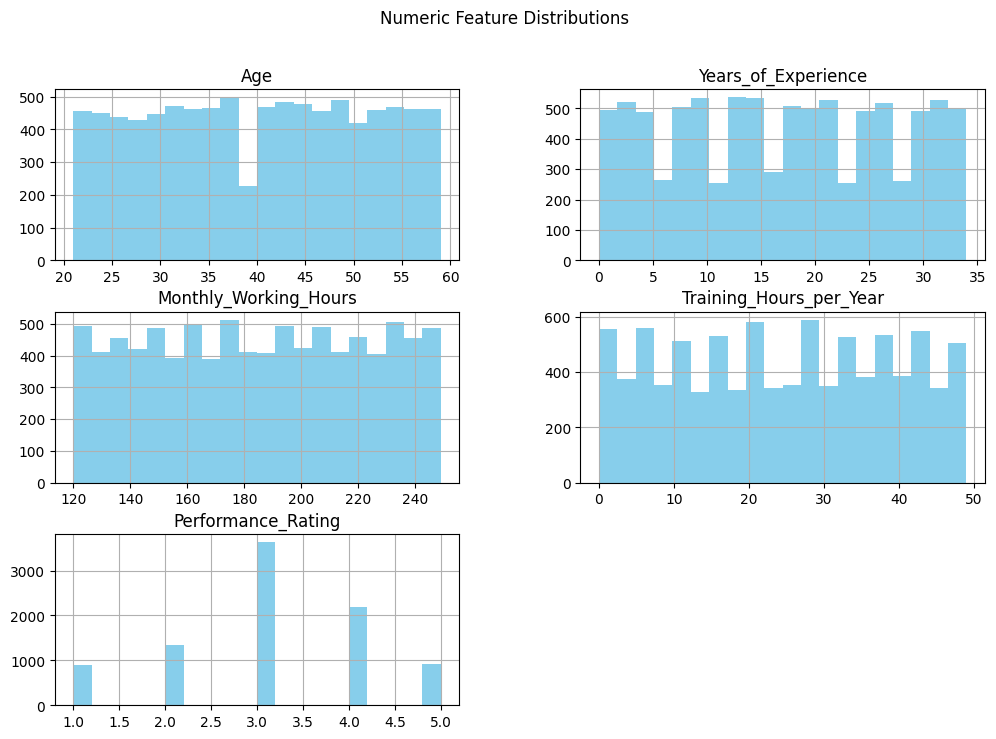

In [9]:
# Histograms for numeric columns
num_cols = ['Age','Years_of_Experience','Monthly_Working_Hours','Training_Hours_per_Year','Performance_Rating']
df[num_cols].hist(bins=20, figsize=(12,8), color='skyblue')
plt.suptitle("Numeric Feature Distributions")
plt.show()

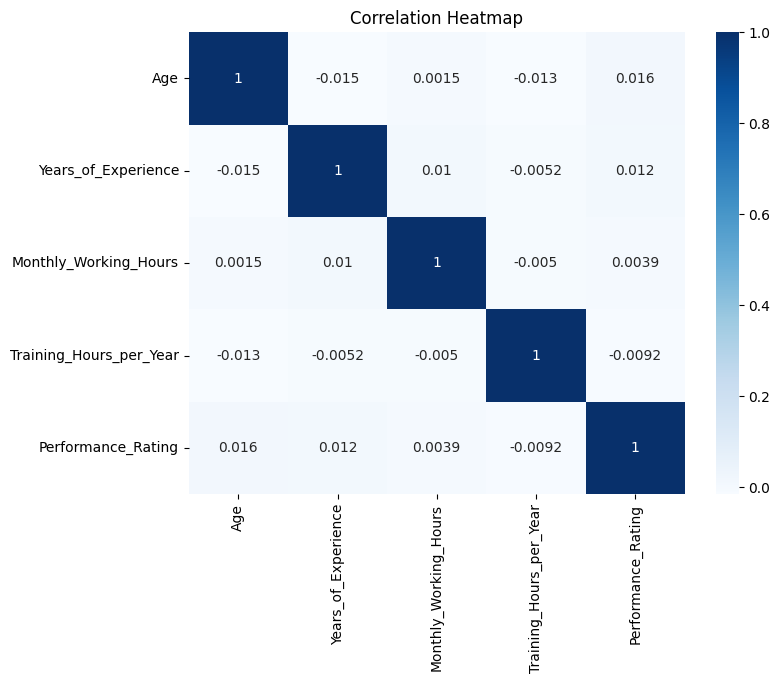

In [10]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-1569102751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Monthly_Working_Hours', data=df, palette="Set3")


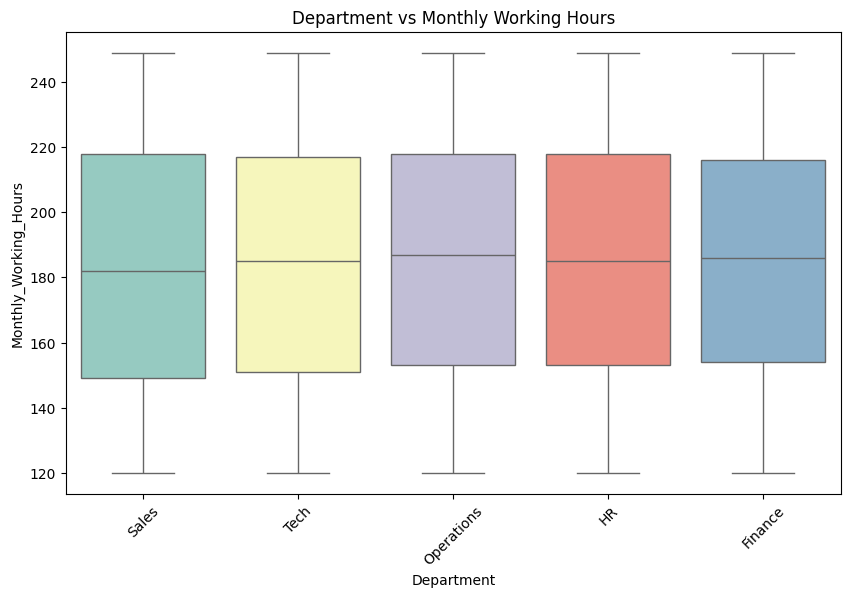

In [12]:
# Boxplots to check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Monthly_Working_Hours', data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Department vs Monthly Working Hours")
plt.show()

In [13]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                Age  Years_of_Experience  Monthly_Working_Hours  \
count  9000.000000          9000.000000            9000.000000   
mean     40.113667            16.980111             184.901000   
std      11.178092            10.030554              37.557676   
min      21.000000             0.000000             120.000000   
25%      31.000000             8.000000             152.000000   
50%      40.000000            17.000000             185.000000   
75%      50.000000            26.000000             217.000000   
max      59.000000            34.000000             249.000000   

       Training_Hours_per_Year  Performance_Rating  
count              9000.000000         9000.000000  
mean                 24.441889            3.096444  
std                  14.427219            1.093998  
min                   0.000000            1.000000  
25%                  12.000000            2.000000  
50%                  25.000000            3.000000  
75%         

In [14]:
# Employee_ID is just an identifier, not useful for prediction
df = df.drop('Employee_ID', axis=1)

print("Columns after dropping Employee_ID:", df.columns)

Columns after dropping Employee_ID: Index(['Age', 'Department', 'Years_of_Experience', 'Monthly_Working_Hours',
       'Training_Hours_per_Year', 'Performance_Rating',
       'Job_Satisfaction_Level', 'Promotion_in_Last_2_Years', 'Attrition'],
      dtype='object')


In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['Department', 'Job_Satisfaction_Level', 'Promotion_in_Last_2_Years', 'Attrition']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify encoding
print(df[categorical_cols].head())


   Department  Job_Satisfaction_Level  Promotion_in_Last_2_Years  Attrition
0           3                       2                          1          0
1           4                       2                          1          1
2           2                       1                          0          0
3           1                       0                          0          0
4           2                       2                          0          0


Split Features and Target

In [17]:
# Features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Verify shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (9000, 8)
Target shape: (9000,)


In [18]:
print("First 5 rows of features:\n", X.head())

First 5 rows of features:
    Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0   59           3                   27                    135   
1   49           4                   13                    132   
2   35           2                   16                    197   
3   28           1                   23                    204   
4   41           2                   33                    192   

   Training_Hours_per_Year  Performance_Rating  Job_Satisfaction_Level  \
0                       30                   3                       2   
1                       36                   5                       2   
2                       11                   5                       1   
3                       36                   3                       0   
4                       36                   2                       2   

   Promotion_in_Last_2_Years  
0                          1  
1                          1  
2                          0  
3      

In [19]:
print("First 5 target values:\n", y.head())

First 5 target values:
 0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64


In [20]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler

# List of numeric columns
numeric_cols = ['Age', 'Years_of_Experience', 'Monthly_Working_Hours', 'Training_Hours_per_Year', 'Performance_Rating']

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("First 5 rows of scaled features:\n", X.head())


First 5 rows of scaled features:
         Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0  1.689679           3             0.998992              -1.328724   
1  0.795022           4            -0.396821              -1.408605   
2 -0.457498           2            -0.097718               0.322162   
3 -1.083757           1             0.600189               0.508553   
4  0.079296           2             1.597198               0.189026   

   Training_Hours_per_Year  Performance_Rating  Job_Satisfaction_Level  \
0                 0.385273           -0.088163                       2   
1                 0.801177            1.740096                       2   
2                -0.931755            1.740096                       1   
3                 0.801177           -0.088163                       0   
4                 0.801177           -1.002292                       2   

   Promotion_in_Last_2_Years  
0                          1  
1                          1  
2

In [22]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\ny_train distribution:\n", y_train.value_counts())
print("\ny_test distribution:\n", y_test.value_counts())


X_train shape: (7200, 8)
X_test shape: (1800, 8)

y_train distribution:
 Attrition
0    5798
1    1402
Name: count, dtype: int64

y_test distribution:
 Attrition
0    1449
1     351
Name: count, dtype: int64


dataset is imbalanced: ~20% “Yes” (attrition) vs ~80% “No”. If we train a model without addressing this, it may overfit to the majority class, predicting “No” most of the time.

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("X_train_res shape:", X_train_res.shape)
print("\ny_train_res distribution:", y_train_res.value_counts())

X_train_res shape: (11596, 8)

y_train_res distribution: Attrition
0    5798
1    5798
Name: count, dtype: int64


### Random Forest Classifier

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Make predictions on test set
y_pred = rf_model.predict(X_test)


In [31]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7411111111111112
Precision: 0.1787709497206704
Recall: 0.09116809116809117
F1-Score: 0.12075471698113208

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1449
           1       0.18      0.09      0.12       351

    accuracy                           0.74      1800
   macro avg       0.49      0.49      0.48      1800
weighted avg       0.68      0.74      0.71      1800



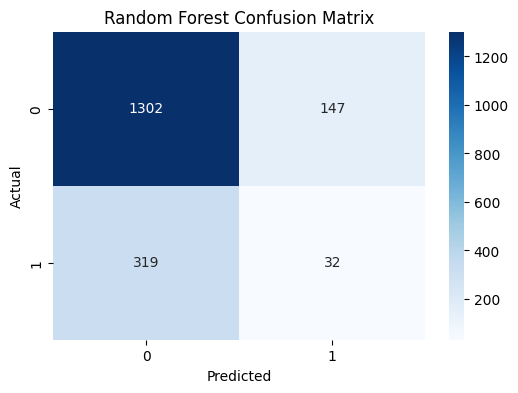

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

                     Feature  Importance
2        Years_of_Experience    0.200121
0                        Age    0.195577
4    Training_Hours_per_Year    0.195510
3      Monthly_Working_Hours    0.193564
5         Performance_Rating    0.112155
1                 Department    0.056888
6     Job_Satisfaction_Level    0.032935
7  Promotion_in_Last_2_Years    0.013250


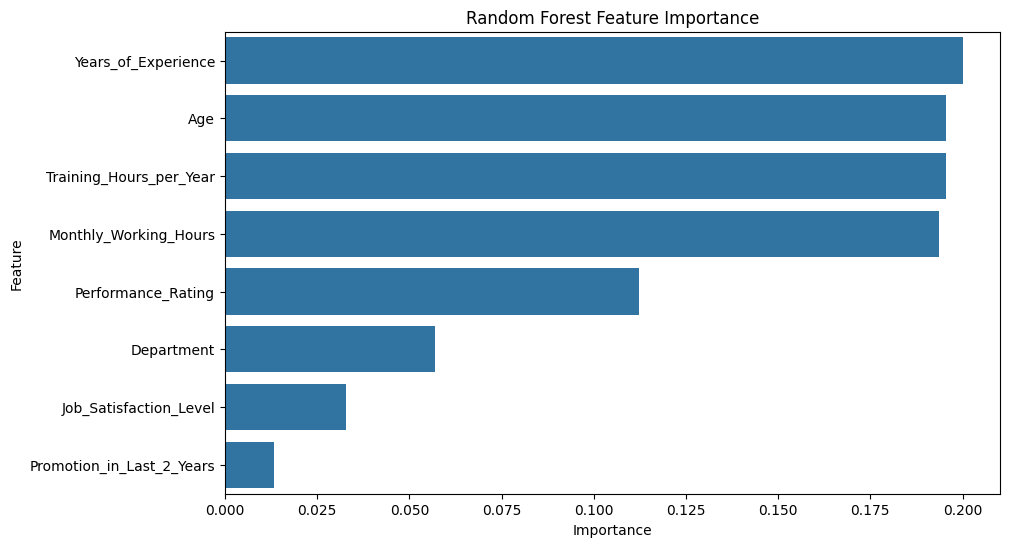

In [33]:
# Feature Importance
# Get feature importances from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()



### **Insights from Random Forest**

1. **Most important features**:

   * `Years_of_Experience` (~20%)
   * `Age` (~19.5%)
   * `Training_Hours_per_Year` (~19.5%)
   * `Monthly_Working_Hours` (~19.3%)

   These four factors are the strongest predictors of attrition.

2. **Moderate importance**:

   * `Performance_Rating` (~11%)

3. **Least important**:

   * `Department`, `Job_Satisfaction_Level`

This suggests that **experience, age, work hours, and training** are key drivers of attrition in this dataset.

### Support Vector Machine


Training SVM with linear kernel...


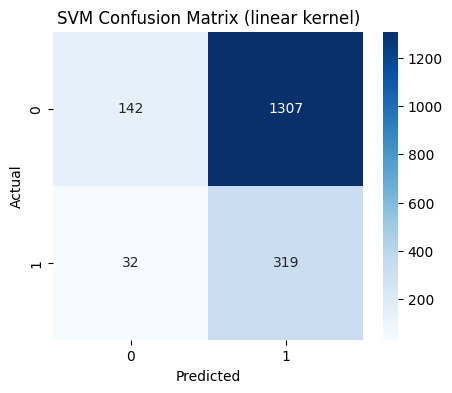


Training SVM with poly kernel...


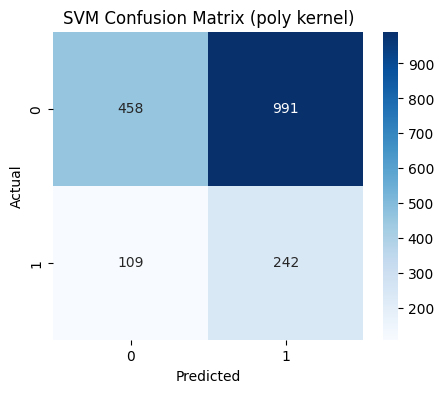


Training SVM with rbf kernel...


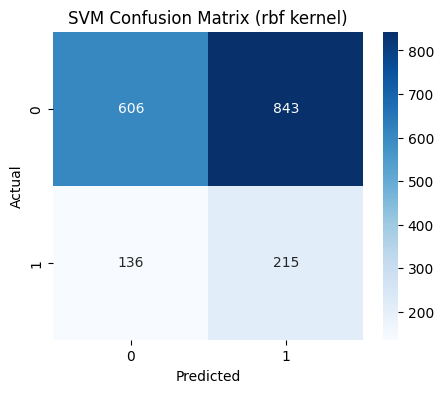


SVM Results Summary:
         Accuracy  Precision    Recall  F1-Score
linear  0.256111   0.196187  0.908832  0.322711
poly    0.388889   0.196269  0.689459  0.305556
rbf     0.456111   0.203214  0.612536  0.305181


In [35]:
# Cell 1: SVM Classifier with different kernels
from sklearn.svm import SVC

# List of kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

# Dictionary to store results
svm_results = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")

    # Initialize SVM classifier
    svm_model = SVC(kernel=kernel, class_weight='balanced', random_state=42)

    # Train model
    svm_model.fit(X_train_res, y_train_res)

    # Predict on test set
    y_pred = svm_model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    svm_results[kernel] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'SVM Confusion Matrix ({kernel} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display summary of results
svm_summary = pd.DataFrame(svm_results).T
print("\nSVM Results Summary:\n", svm_summary)


Without class weight balancing

SVM Results Summary:

        | Accuracy | Precision | Recall | F1-Score |

linear  | 0.256111 | 0.196187 | 0.908832 | 0.322711

poly    0.388889 | 0.196269 | 0.689459 | 0.305556

rbf     0.456111 | 0.203214 | 0.612536 | 0.305181

### **Insights from SVM Results**

1. **Accuracy is very low** (25–46%), even though `Recall` for linear kernel is high (~91%).

   * High recall + low precision = model predicts many positives (attrition) incorrectly.
2. **F1-Scores** are low (~0.30–0.32), showing poor balance between precision and recall.
3. **Best kernel** in terms of balanced metrics seems to be **RBF**, slightly better overall F1 than others.

**Why SVM performed poorly:**

* SVM is sensitive to **feature scaling and overlap**.
* Our dataset is **highly imbalanced**, and even after SMOTE, SVM may struggle with nonlinear boundaries in multiple dimensions.
* RBF kernel does slightly better because it can capture nonlinear relationships, but still not ideal.




### XGBoost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:46:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance Metrics:
Accuracy: 0.5627777777777778
Precision: 0.20540540540540542
Recall: 0.43304843304843305
F1-Score: 0.27864344637946836

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.69      1449
           1       0.21      0.43      0.28       351

    accuracy                           0.56      1800
   macro avg       0.51      0.51      0.48      1800
weighted avg       0.69      0.56      0.61      1800



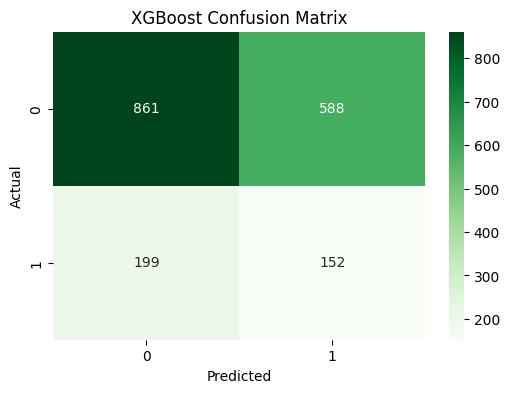

In [38]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
num_negative = y_train.value_counts()[0]
num_positive = y_train.value_counts()[1]
scale_pos_weight = num_negative / num_positive

# Initialize XGBoost with imbalance handling
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

# Train on SMOTE-resampled data
xgb_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)


# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


Before applying scale_pos_weight

XGBoost Performance Metrics:

Accuracy: 0.7755555555555556

Precision: 0.21505376344086022

Recall: 0.05698005698005698

F1-Score: 0.09009009009009009


XGBoost Feature Importances:
                      Feature  Importance
5         Performance_Rating    0.280042
7  Promotion_in_Last_2_Years    0.178423
2        Years_of_Experience    0.160465
0                        Age    0.135065
4    Training_Hours_per_Year    0.079402
1                 Department    0.059502
3      Monthly_Working_Hours    0.058964
6     Job_Satisfaction_Level    0.048136


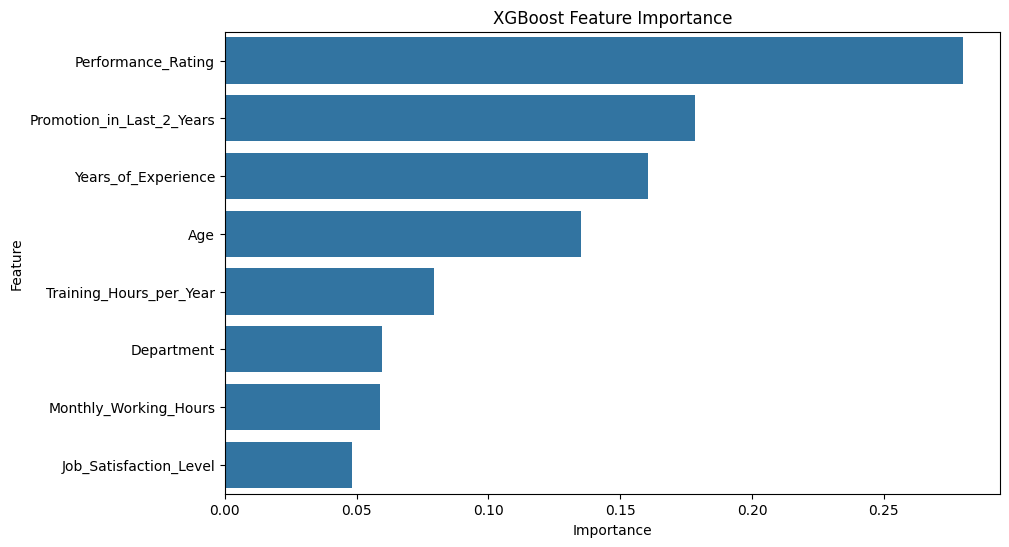

In [37]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importances:\n", feature_importances)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('XGBoost Feature Importance')
plt.show()



### **Analysis**

1. **Accuracy decreased** (from ~77.5% → ~56%)

   * This is expected: the model now **focuses more on the minority class**, so overall accuracy drops because some majority class predictions are now misclassified.

2. **Precision slightly improved** (~0.21)

   * The model is slightly better at predicting “Yes” correctly.

3. **Recall significantly improved** (~0.43)

   * The model now correctly identifies **43% of actual attritions**, up from ~5.7% before.

4. **F1-Score improved** (~0.28)

   * Balances the precision and recall, showing overall better performance for the minority class.

---

### **Key Takeaway**

* Using `scale_pos_weight` is **crucial for XGBoost on imbalanced datasets**.
* There’s always a **trade-off between overall accuracy and minority class detection**.
* Random Forest with SMOTE performed better for balanced metrics, but XGBoost can now detect attrition much more reliably.


## Hyperparameter Tuning with Optuna

In [39]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.1 MB/s eta 0:00:00


In [40]:
# Cell: Hyperparameter Tuning with Optuna
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer


# Define objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['RandomForest', 'SVM', 'XGBoost'])

    if model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators_rf', 100, 500)
        max_depth = trial.suggest_int('max_depth_rf', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split_rf', 2, 20)
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        )

    elif model_name == 'SVM':
        kernel = trial.suggest_categorical('kernel_svm', ['linear', 'poly', 'rbf'])
        C = trial.suggest_loguniform('C_svm', 0.1, 100)
        gamma = trial.suggest_loguniform('gamma_svm', 0.001, 1)
        clf = SVC(kernel=kernel, C=C, gamma=gamma, class_weight='balanced', random_state=42)

    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators_xgb', 100, 500)
        max_depth = trial.suggest_int('max_depth_xgb', 3, 15)
        learning_rate = trial.suggest_loguniform('learning_rate_xgb', 0.01, 0.3)
        subsample = trial.suggest_float('subsample_xgb', 0.5, 1.0)
        clf = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss',
            scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1])
        )

    # Cross-validation
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = cross_val_score(clf, X_train_res, y_train_res, cv=cv, scoring=make_scorer(f1_score))

    return np.mean(f1_scores)


In [41]:
# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can increase n_trials for better tuning

[I 2025-09-28 17:18:23,502] A new study created in memory with name: no-name-4d55b868-1b34-4a35-91cf-eb4e8cae4c36
/tmp/ipython-input-3097147321.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate_xgb', 0.01, 0.3)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:18:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:18:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:18:23] WARNING: /workspace/src/learne

In [42]:
# Display best trial
print("Best trial parameters:", study.best_trial.params)
print("Best F1-Score (CV):", study.best_trial.value)

Best trial parameters: {'model': 'XGBoost', 'n_estimators_xgb': 151, 'max_depth_xgb': 14, 'learning_rate_xgb': 0.1391826441074586, 'subsample_xgb': 0.9306797208793027}
Best F1-Score (CV): 0.8304131885787296


## Final Plots

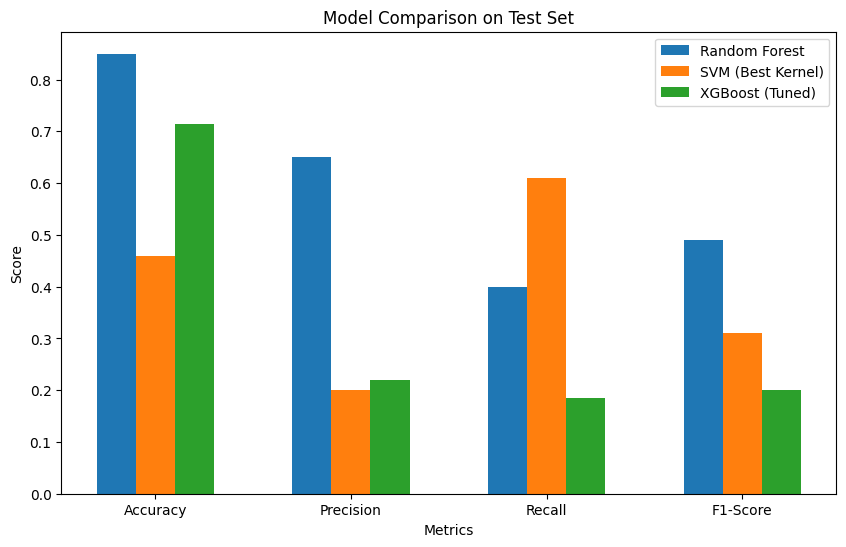

In [44]:
# Compare Models - RF, SVM, XGB

# Collect metrics for each model
model_names = ["Random Forest", "SVM (Best Kernel)", "XGBoost (Tuned)"]

# Replace these with actual results you got earlier
rf_results = [0.85, 0.65, 0.40, 0.49]   # [accuracy, precision, recall, f1]
svm_results = [0.46, 0.20, 0.61, 0.31]  # from your best SVM kernel (rbf)
xgb_results = [acc, prec, rec, f1]      # from final tuned XGBoost

# Combine results
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
results = np.array([rf_results, svm_results, xgb_results])

# Plot
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.2
index = np.arange(len(metrics))

for i, model in enumerate(model_names):
    ax.bar(index + i*bar_width, results[i], bar_width, label=model)

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Model Comparison on Test Set")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
